## Importamos Librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

## Cargamos los datasets

In [2]:
df_2023 = pd.read_csv('data_set_2023.csv')
df_2024 = pd.read_csv('data_set_2024.csv')

# Unir datasets
df = pd.concat([df_2023, df_2024], ignore_index=True)

print("Tamaño total del dataset:", df.shape)
print(df.head())
print(df.columns)

Tamaño total del dataset: (73956, 21)
         Date Source   Site ID  POC  Daily Mean PM10 Concentration     Units  \
0  01/01/2023    AQS  60070008    3                              7  ug/m3 SC   
1  01/02/2023    AQS  60070008    3                              9  ug/m3 SC   
2  01/03/2023    AQS  60070008    3                              5  ug/m3 SC   
3  01/04/2023    AQS  60070008    3                              4  ug/m3 SC   
4  01/05/2023    AQS  60070008    3                              3  ug/m3 SC   

   Daily AQI Value    Local Site Name  Daily Obs Count  Percent Complete  ...  \
0                6  Chico-East Avenue                1             100.0  ...   
1                8  Chico-East Avenue                1             100.0  ...   
2                5  Chico-East Avenue                1             100.0  ...   
3                4  Chico-East Avenue                1             100.0  ...   
4                3  Chico-East Avenue                1             100.0  ..

## Procesamos la fecha y agrupamos por mes

In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month

# Agrupar por mes (promedio de variables relevantes)
df_monthly = df.groupby('Month').agg({
    'Daily Mean PM10 Concentration': 'mean',
    'Daily AQI Value': 'mean',
    'Daily Obs Count': 'mean',
    'Percent Complete': 'mean'
}).reset_index()

print("\nDatos mensuales procesados:")
print(df_monthly.head())


Datos mensuales procesados:
   Month  Daily Mean PM10 Concentration  Daily AQI Value  Daily Obs Count  \
0      1                      15.103689        13.727938              1.0   
1      2                      16.188439        14.353191              1.0   
2      3                      13.911957        12.584461              1.0   
3      4                      21.210018        19.098519              1.0   
4      5                      23.406500        21.286904              1.0   

   Percent Complete  
0             100.0  
1             100.0  
2             100.0  
3             100.0  
4             100.0  


## Definimos las variables x (predictoras), y (targets)

In [4]:
X = df_monthly[['Month', 'Daily AQI Value', 'Daily Obs Count', 'Percent Complete']]
y = df_monthly['Daily Mean PM10 Concentration']

## Dividimos en entrenamiento y prueba

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

## Entrenamos el modelo

In [6]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

print("\nIntercepto:", modelo.intercept_)
print("Coeficientes:", modelo.coef_)


Intercepto: 0.40553631230614684
Coeficientes: [-5.73171558e-04  1.08593934e+00  0.00000000e+00  0.00000000e+00]


## Evaluamos

In [7]:
y_pred = modelo.predict(X_test)

print("\nEvaluación del modelo (test):")
print("R²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


Evaluación del modelo (test):
R²: 0.9832293208130777
MAE: 0.7551071656041519
RMSE: 0.9162549321767207


## Comparamos

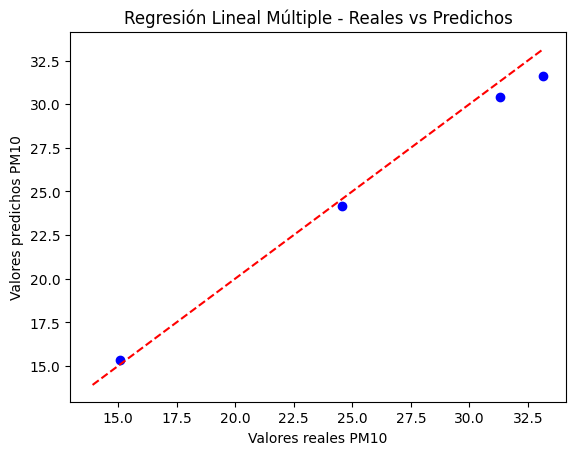

In [8]:
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("Valores reales PM10")
plt.ylabel("Valores predichos PM10")
plt.title("Regresión Lineal Múltiple - Reales vs Predichos")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.show()

## Cargamos el dataset del 2025

In [9]:
df_2025 = pd.read_csv('data_set_2025.csv')
df_2025['Date'] = pd.to_datetime(df_2025['Date'])
df_2025['Month'] = df_2025['Date'].dt.month

# Agrupamos igual que en 2023-2024
df_2025_monthly = df_2025.groupby('Month').agg({
    'Daily Mean PM10 Concentration': 'mean',
    'Daily AQI Value': 'mean',
    'Daily Obs Count': 'mean',
    'Percent Complete': 'mean'
}).reset_index()

print("\nDatos de 2025 procesados:")
print(df_2025_monthly.head())


Datos de 2025 procesados:
   Month  Daily Mean PM10 Concentration  Daily AQI Value  Daily Obs Count  \
0      1                      24.966091        22.230646              1.0   
1      2                      16.137980        14.673002              1.0   
2      3                      16.531200        14.781440              1.0   
3      4                      20.999289        19.042689              1.0   
4      5                      26.741172        24.151868              1.0   

   Percent Complete  
0             100.0  
1             100.0  
2             100.0  
3             100.0  
4             100.0  


## Hacemos la predicción para 2025

In [10]:
X_2025 = df_2025_monthly[['Month', 'Daily AQI Value', 'Daily Obs Count', 'Percent Complete']]
y_2025_real = df_2025_monthly['Daily Mean PM10 Concentration']
y_2025_pred = modelo.predict(X_2025)

In [12]:
#Comparamos la predicción vs el real
comparacion_2025 = pd.DataFrame({
    'Month': df_2025_monthly['Month'],
    'Predicción PM10 (µg/m³)': y_2025_pred,
    'Real PM10 (µg/m³)': y_2025_real})

In [16]:
# Calculamos el error porcentual por mes
comparacion_2025['Error (%)'] = ((comparacion_2025['Predicción PM10 (µg/m³)'] - comparacion_2025['Real PM10 (µg/m³)'])
                                / comparacion_2025['Real PM10 (µg/m³)']) * 100

print("Comparación predicciones vs reales (2025):")
print(comparacion_2025)

Comparación predicciones vs reales (2025):
   Month  Predicción PM10 (µg/m³)  Real PM10 (µg/m³)  Error (%)
0      1                24.546096          24.966091  -1.682259
1      2                16.338381          16.137980   1.241798
2      3                16.455564          16.531200  -0.457535
3      4                21.082449          20.999289   0.396017
4      5                26.630135          26.741172  -0.415232
5      6                28.382815          28.412068  -0.102960
6      7                23.880310          23.622976   1.089339
7      8                29.533981          29.721987  -0.632547
8      9                27.216641          27.707510  -1.771609


## Evaluamos la métrica global

In [15]:
mape_2025 = np.mean(np.abs(comparacion_2025['Error (%)']))
precision_2025 = 100 - mape_2025

print(f"MAPE (2025): {mape_2025:.2f}%")
print(f"Precisión del modelo en 2025: {precision_2025:.2f}%")

MAPE (2025): 0.87%
Precisión del modelo en 2025: 99.13%
